In [119]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=pd.read_excel('Superstore_USA.xlsx')

In [121]:
dataset.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [122]:
dataset.shape

(9426, 24)

# Data Cleaning

In [123]:
 dataset.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [124]:
value=dataset['Product Base Margin'].mean()
dataset['Product Base Margin'].fillna(value,inplace=True)

In [125]:
dataset.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

# Order Priority Analysis

In [126]:
dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [127]:
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [128]:
dataset['Order Priority']=dataset['Order Priority'].replace('Critical ','Critical' )

In [129]:
dataset.groupby('Order Priority')['Order Priority'].count()

Order Priority
Critical         1805
High             1970
Low              1926
Medium           1844
Not Specified    1881
Name: Order Priority, dtype: int64

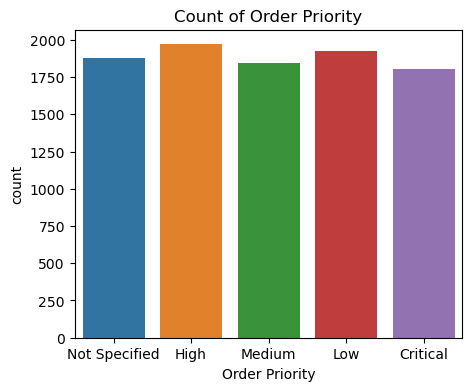

In [130]:
plt.figure(figsize=(5,4))
sns.countplot(x='Order Priority', data=dataset)
plt.title('Count of Order Priority')
plt.savefig('Count of Order.jpg')
plt.show()

# Shipping Mode Analysis

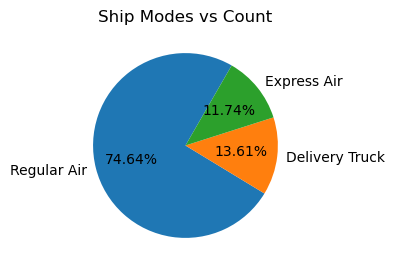

In [131]:
plt.figure(figsize=(4,3))
value=dataset['Ship Mode'].value_counts()
ship_modes=value.index
ship_mode_count=value.values
plt.pie(ship_mode_count,labels=ship_modes,startangle=60,autopct="%0.2f%%")
plt.title('Ship Modes vs Count')
plt.show()

# Analysis of Product Category vs Shipping Mode

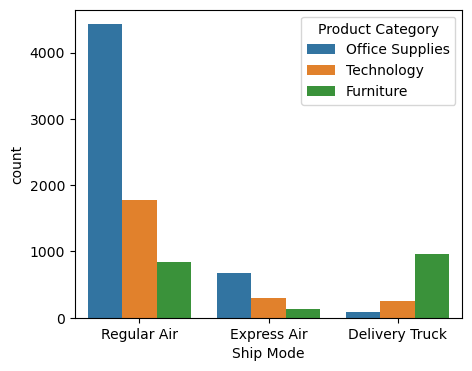

In [132]:
plt.figure(figsize=(5,4))
sns.countplot(x='Ship Mode',data=dataset,hue='Product Category')
plt.show()

# Customer Segment

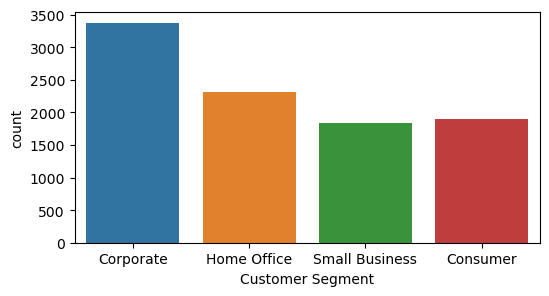

In [133]:
plt.figure(figsize=(6,3))
sns.countplot(x='Customer Segment',data=dataset)
plt.show()

# Product Category

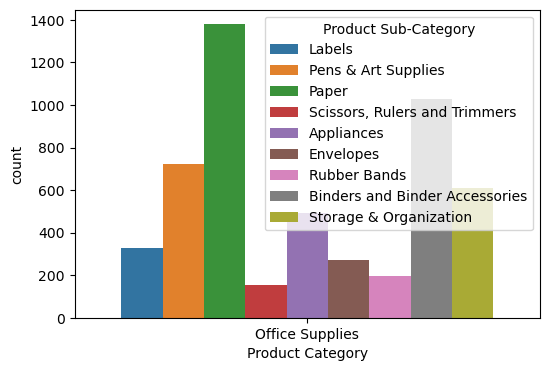

In [134]:
plt.figure(figsize=(6,4))
sns.countplot(x='Product Category',data=dataset[dataset['Product Category']=='Office Supplies'],hue="Product Sub-Category")
plt.show()

In [135]:
dataset['Order Year']=dataset['Order Date'].dt.year

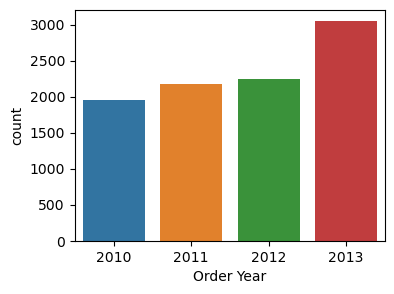

In [136]:
plt.figure(figsize=(4,3))
sns.countplot(x='Order Year',data=dataset)
plt.show()

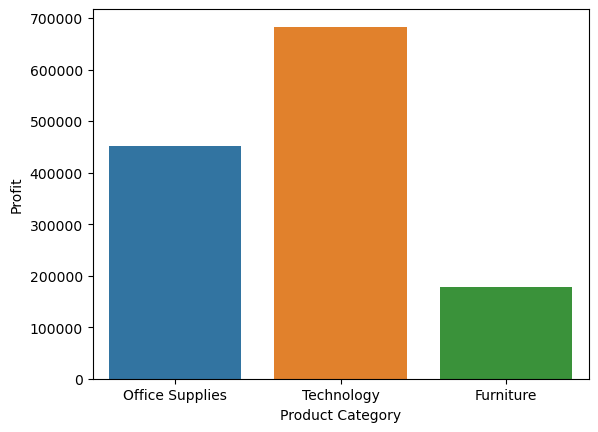

In [137]:
sns.barplot(x='Product Category',y='Profit',data=dataset,estimator='sum',errorbar=None)
plt.show()

# Least Sales and Maximum Sales States

In [139]:
print('Top 5 State with least Sales:')
print(dataset['State or Province'].value_counts()[-5:])
print()
print()
print('Top 5 state with Maximum Sales')
print(dataset['State or Province'].value_counts()[:6])

Top 5 State with least Sales:
State or Province
North Dakota    34
South Dakota    28
Wyoming         21
Rhode Island    20
Delaware        15
Name: count, dtype: int64


Top 5 state with Maximum Sales
State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Ohio           396
Name: count, dtype: int64
